# Data Visualization

*Extracting sample data*

In [1]:
!tar -xf sample_data.tar -C .

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import matplotlib.patches as patches
import matplotlib.text as text
import lmdb
import os
import numpy as np

data_path = './'
land_ldmb = data_path + 'output_ldmks_combined.lmdb/'
bbox_ldmb = data_path + 'output_best_bbox_combined.lmdb/'
yaw_ldmb = data_path + 'output_yaw_combined.lmdb/'

*opening the LMDBs*

In [3]:
## landmarks
env = lmdb.open(land_ldmb)
txn = env.begin()
## bbox
envb = lmdb.open(bbox_ldmb)
txnb = envb.begin()
## yaw
envy = lmdb.open(yaw_ldmb)
txny = envy.begin()

## Visualizing the metadata

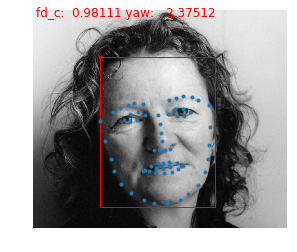

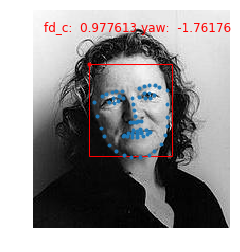

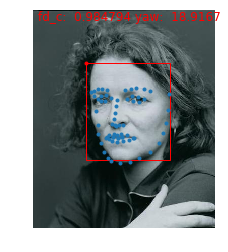

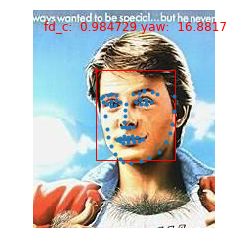

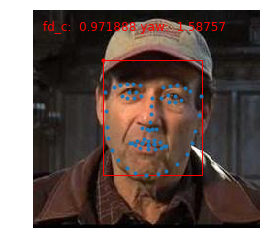

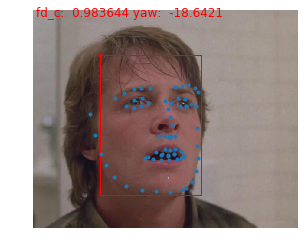

In [4]:
imgs = pickle.load(open(data_path+'/imgs.pkl','r'))
for count, key in enumerate(imgs.keys()):
    buff = txn.get(key)
    land = np.frombuffer(buff,np.float32)
    land = land.reshape(2,68).T
    buff = txnb.get(key)
    bbox = np.frombuffer(buff,np.float32)
    bbox = bbox.reshape(1,5).T
    buff = txny.get(key)
    yaw = np.frombuffer(buff,np.float32)
    yaw = yaw[0]
    im = imgs[key]
    imgs[key] = im
    fig,ax = plt.subplots(1)
    ax.imshow(im[:,:,::-1])
    rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.text(10, 20, ' '.join(['fd_c: ',str(bbox[-1][0]),'yaw: ',str(yaw)]), fontsize=12, color='red')
    plt.plot(land[:,0],land[:,1],'.')
    plt.plot(bbox[0,0],bbox[1,0],'r.')
    plt.axis('off')
    plt.show()

*closing the envs*

In [5]:
env.close()
envb.close()
envy.close()

In [6]:
! rm -r output_*; rm imgs.pkl;